# 120 Years of Olympics
   
   ![Cover](https://images.unsplash.com/photo-1569517282132-25d22f4573e6?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1666&q=80)

Looking back at 120 years of Olympics using a dataset from [Kaggel](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). This dataset contains data of all the Games from Athens 1896 to Rio 2016. In this notebook I will be analyzing how the Olympics have evolved over time including factors like participation of women, nations and events.

In [7]:
!pip install jovian --upgrade --quiet

In [8]:
import jovian

In [9]:
# Execute this to save new versions of the notebook
jovian.commit(project="olympics")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "alkabhambhu98/olympics" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/alkabhambhu98/olympics


'https://jovian.ai/alkabhambhu98/olympics'

# Importing Libraries

In [10]:
!pip install plotly --quiet
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [11]:
import pandas as pd
import numpy as np

In [12]:
!pip install plotly-express --quiet
!pip install squarify --quiet

import seaborn as sns
import plotly_express as px
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import squarify

In [13]:
!pip install opendatasets --quiet  ## to download dataset
import opendatasets as od

In [14]:
import warnings #to filter out the warnings
warnings.filterwarnings('ignore')

In [15]:
from IPython.core.display import HTML as Center #to center our plots

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Data Loading

In [16]:
dataset_url = ('https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=noc_regions.csv')

In [17]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alkabhambhu
Your Kaggle Key: ········


100%|██████████| 5.43M/5.43M [00:00<00:00, 59.3MB/s]

In [18]:
events_df = pd.read_csv('120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [19]:
events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [20]:
events_df.shape

(271116, 15)

Events dataset has 271116 rows & 15 columns, containing the following details:
* Athlete's name, age, gender, country, sports, events, medals 
* City - Host city
* NOC - National Olympic Committee, 3 letter code unique for each country. 
* Season - Contrary to common belief, summer and winter Olympics are not held in the same year. They were held in              the same year till 1992 but thereafter, the four year cycle began with winter games in 1994 and                 summer games in 1996.

# Data Preparation & Cleaning

In [21]:
events_df.rename(columns={'NOC':'Country'},inplace=True) #renaming 'NOC' column name to 'Country'

In [22]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Name     271116 non-null  object 
 2   Sex      271116 non-null  object 
 3   Age      261642 non-null  float64
 4   Height   210945 non-null  float64
 5   Weight   208241 non-null  float64
 6   Team     271116 non-null  object 
 7   Country  271116 non-null  object 
 8   Games    271116 non-null  object 
 9   Year     271116 non-null  int64  
 10  Season   271116 non-null  object 
 11  City     271116 non-null  object 
 12  Sport    271116 non-null  object 
 13  Event    271116 non-null  object 
 14  Medal    39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


As we can see, there are several missing values in Age, Height and Weight column. While we cannot assume values for Age column, we can fill height & weight column with an average for better analysis. 

In [23]:
events_df.isna().sum()  #Finding exact number of missing values

ID              0
Name            0
Sex             0
Age          9474
Height      60171
Weight      62875
Team            0
Country         0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      231333
dtype: int64

In [24]:
events_df['Age'] = events_df['Age'].fillna(0)
events_df['Height'] = round(events_df['Height'].fillna((events_df['Height'].mean())),0)
events_df['Weight'] = round(events_df['Weight'].fillna((events_df['Weight'].mean())),0)

In [25]:
events_df[['Age','Height','Weight']] = events_df[['Age','Height','Weight']].astype(int)

In [26]:
events_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,24.663827,175.26374,70.771747,1978.378480
std,39022.286345,7.840652,9.27917,12.575323,29.877632
min,1.000000,0.000000,127.00000,25.000000,1896.000000
25%,34643.000000,21.000000,170.00000,63.000000,1960.000000
50%,68205.000000,24.000000,175.00000,71.000000,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


We have a maximum age of 97. Lets explore more about it

In [27]:
events_df[events_df['Age'] > 80]

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
9371,5146,George Denholm Armour,M,84,175,71,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60861,31173,Thomas Cowperthwait Eakins,M,88,175,71,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60862,31173,Thomas Cowperthwait Eakins,M,88,175,71,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60863,31173,Thomas Cowperthwait Eakins,M,88,175,71,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
98118,49663,Winslow Homer,M,96,175,71,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
154855,77710,Robert Tait McKenzie,M,81,175,71,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
236912,118789,Louis Tauzin,M,81,175,71,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
257054,128719,John Quincy Adams Ward,M,97,175,71,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


💡 Did you know that art competitions were part of Olympics between 1912 and 1948. But later on in 1954 art competitions were discontinued because artists were considered to be professionals, while Olympic athletes were required to be amateurs. Interesting!! 

In [28]:
df = events_df.copy()  #It's a good practice to make a copy of your data.

# Exploratory Analysis and Visualization 

Lets find out the number of games per season & host cities.

In [29]:
number_of_games = df.groupby('Season')['Games'].nunique().reset_index()
number_of_games.set_index(['Season'], inplace=True)

number_of_games.transpose().style.background_gradient(cmap ='Pastel1')

Season,Summer,Winter
Games,29,22


💡 Olympics has been cancelled 3 times due to World war! 

In [30]:
host_cities = df.groupby('City')['Games'].unique().reset_index()
host_cities

,City,Games
0,Albertville,[1992 Winter]
1,Amsterdam,[1928 Summer]
2,Antwerpen,[1920 Summer]
3,Athina,"[2004 Summer, 1906 Summer, 1896 Summer]"
4,Atlanta,[1996 Summer]
5,Barcelona,[1992 Summer]
6,Beijing,[2008 Summer]
7,Berlin,[1936 Summer]
8,Calgary,[1988 Winter]
9,Chamonix,[1924 Winter]


💡 While London and Athens(Athina) both have hosted Olympics 3 times, the IOC doesn't recognize 1906 summer Olympics because its an exception to the '4 years' rule. So, London is recognized as the only city to have hosted three Olympics. Now lets look at the countries who have won maximum number of medals in Olympics.

In [31]:
Medals = pd.notnull(df['Medal']) 
df_medal = df[Medals]

#creating pivot table to count type of medals won by each country

counted = df_medal.pivot_table(index='Country', values='Name', columns='Medal', aggfunc='count')
counted['Total_medal'] = counted['Bronze']+ counted['Gold']+counted['Silver']
counted = counted.fillna(0)
counted = counted[['Bronze','Gold','Silver','Total_medal']].astype(int)

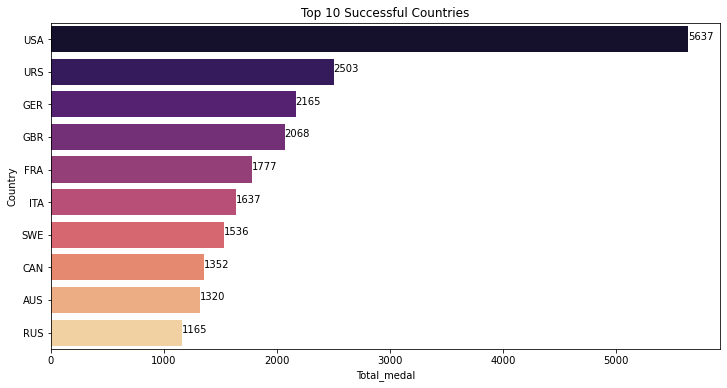

In [32]:
top10_total = counted.sort_values('Total_medal',ascending=False).head(10)

plt.figure(figsize=(12,6))

for index,value in enumerate(top10_total['Total_medal']):
    plt.text(x=value, y= index, s=f"{value}")

sns.barplot(top10_total.Total_medal,top10_total.index,palette = "magma" )
plt.title('Top 10 Successful Countries');

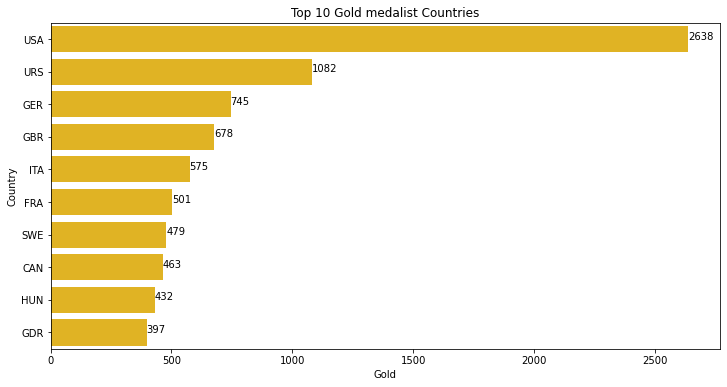

In [33]:
top10_gold = counted.sort_values('Gold',ascending=False).head(10)

plt.figure(figsize=(12,6))

for index,value in enumerate(top10_gold['Gold']):
    plt.text(x=value, y= index, s=f"{value}")

sns.barplot(top10_gold.Gold,top10_gold.index, color = '#ffc305')
plt.title('Top 10 Gold medalist Countries');

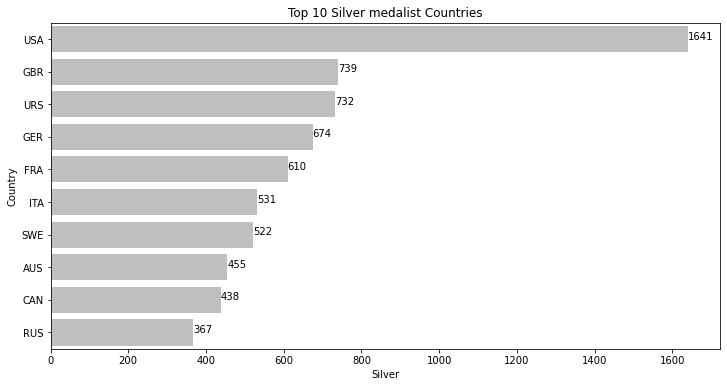

In [34]:
top10_silver = counted.sort_values('Silver',ascending=False).head(10)

plt.figure(figsize=(12,6))

for index,value in enumerate(top10_silver['Silver']):
    plt.text(x=value, y= index, s=f"{value}")

sns.barplot(top10_silver.Silver,top10_silver.index, color = '#bfbfbf')
plt.title('Top 10 Silver medalist Countries');

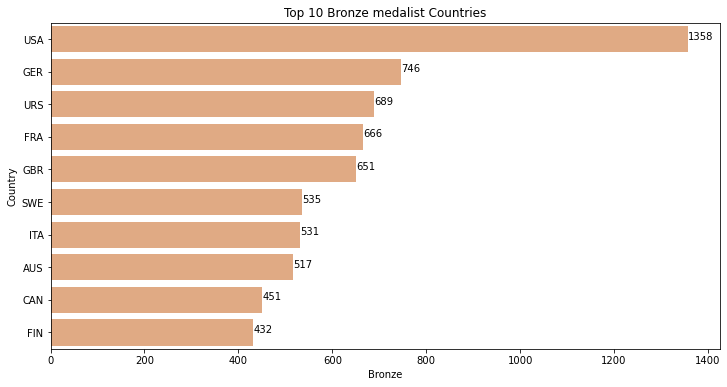

In [35]:
top10_bronze = counted.sort_values('Bronze',ascending=False).head(10)

plt.figure(figsize=(12,6))

for index,value in enumerate(top10_bronze['Bronze']):
    plt.text(x=value, y= index, s=f"{value}")

sns.barplot(top10_bronze.Bronze,top10_bronze.index, color = '#efa775')
plt.title('Top 10 Bronze medalist Countries');

Medal count of USA in Olympics is unparalleled.The difference with the second position is almost double in every segment. Now, lets look at the participation over the years.

In [36]:
country_participation = df.groupby(['Year', 'Season'])['Country'].nunique().reset_index()
country_participation = country_participation.pivot(index='Year',columns='Season', values = 'Country')

summer = country_participation['Summer'].dropna()
winter = country_participation['Winter'].dropna()

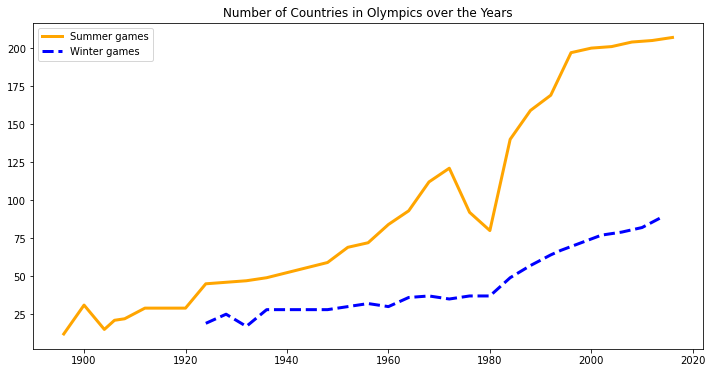

In [37]:
plt.figure(figsize=(12,6))

plt.plot(summer,'-', linewidth= 3,color ='orange')
plt.plot(winter, '--b', linewidth= 3)
plt.legend(['Summer games','Winter games'])
plt.title('Number of Countries in Olympics over the Years')
plt.show();

There is a significant drop in participation in 1980 Summer Olympics because over 40 countries including USA, boycotted the game to protest against the Soviet invasion of Afghanistan. Later The Soviet Union and its allies boycotted 1984 Summer Olympics in Los Angeles.

## Analysis of Athletes & Gender

Lets look at the number of participation in Summer games. 

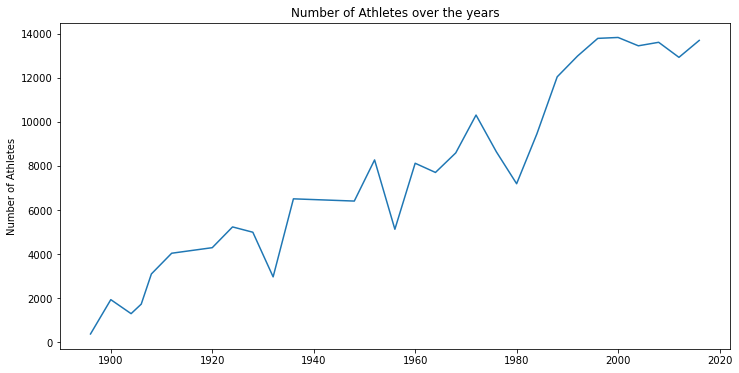

In [38]:
count_athletes = df.groupby(['Year','Season'])['ID'].count().reset_index()
count_athletes = count_athletes[count_athletes['Season']== 'Summer']

plt.figure(figsize=(12,6))

plt.plot(count_athletes.Year,count_athletes.ID )
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes over the years');

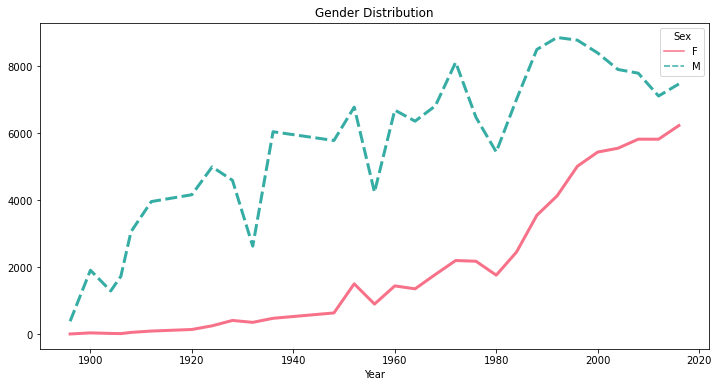

In [39]:
gender = df[df['Season']=='Summer'].groupby(['Year','Sex']).size().reset_index().pivot(columns='Sex', index='Year',values=0)
gender = gender.fillna(0)

plt.figure(figsize=(12,6))
sns.lineplot(data=gender,linewidth=3, palette='husl')
plt.title('Gender Distribution');

The gender disparity has narrowed down since 2000 at a rapid speed and the Tokyo Olympics 2020 is the most gender equal games of all time, with women comprising almost 49% of the total participants.
\
<img src="https://images.unsplash.com/photo-1561542313-b23c8ff631f9?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width=500 
height=500 />

In [40]:
fig = px.histogram(df_medal, df_medal['Medal'], color = 'Sex', barmode='group', color_discrete_map = {'M' :'#6da39c', 'F':'#a36d9a' })
fig.update_layout(title_text='Medal distribution by Gender', title_x=0.5)

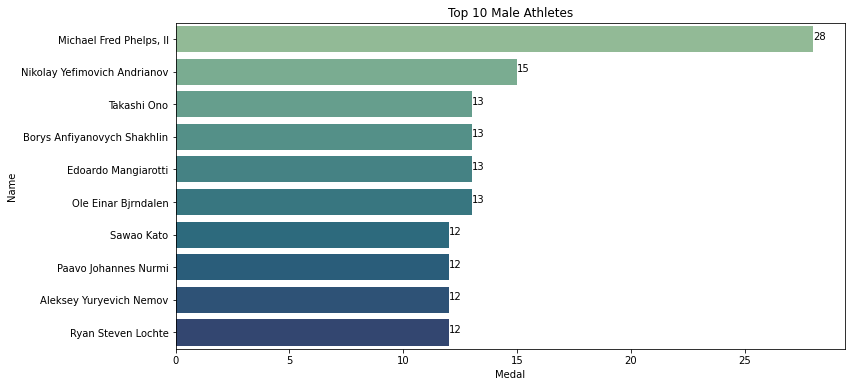

In [41]:
top_athletes = df_medal.groupby(['Name','Sex'])['Medal'].count().sort_values(ascending=False).reset_index()

male_top_athletes = top_athletes[top_athletes['Sex'] == 'M'].head(10)

plt.figure(figsize=(12,6))

for index,value in enumerate(male_top_athletes['Medal']):
    plt.text(x=value, y= index, s=f"{value}")

sns.barplot(male_top_athletes.Medal,male_top_athletes.Name, palette ='crest')
plt.title('Top 10 Male Athletes');

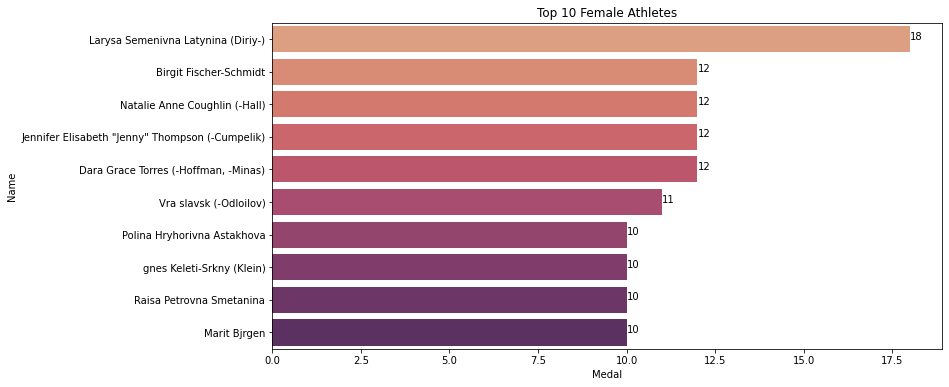

In [42]:
female_top_athletes = top_athletes[top_athletes['Sex'] == 'F'].head(10)

plt.figure(figsize=(12,6))

for index,value in enumerate(female_top_athletes['Medal']):
    plt.text(x=value, y= index, s=f"{value}")

sns.barplot(female_top_athletes.Medal,female_top_athletes.Name, palette ='flare')
plt.title('Top 10 Female Athletes');

In [43]:
plt.figure(figsize=(12,6))
age = df_medal[df_medal['Age'].between(10,50)]
fig = px.histogram(age, x='Age', color_discrete_sequence=['indianred'], title='Average Medalist Age')
fig.update_layout(title_x=0.5)

<Figure size 864x432 with 0 Axes>

Oscar Swahn, a Swedish shooter, is the oldest athlete to compete in Olympics. He was 72 years old when he competed in Olympics in 1920. While Dimitros Loundras, 10-year-old gymnast is the youngest athlete to compete in 1896 Olympics.
\
\
Now lets look at the popular sports among athletes over the age of 45 years in modern Olympics.

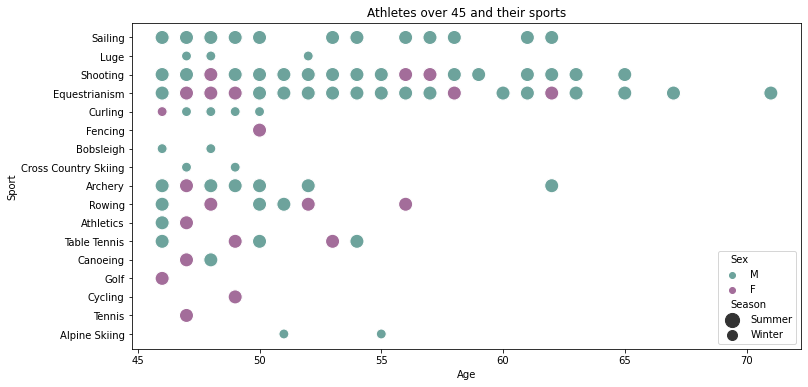

In [44]:
age_over_45 = df[(df['Age'] > 45)& (df['Year'] > 1990)]


plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Sport', hue = 'Sex',data= age_over_45, palette={'M' :'#6da39c', 'F':'#a36d9a'}, size = 'Season',sizes=(100, 200))
plt.title('Athletes over 45 and their sports');

Equestrianism and Shooting are the most popular games among the athletes over 45. Now, lets look at the top 15 most participated games.

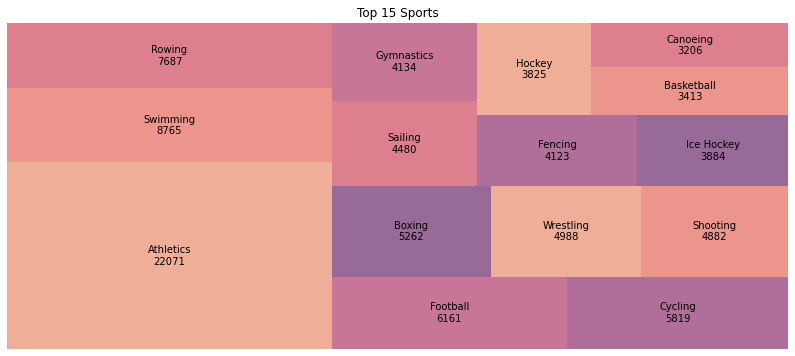

In [45]:
games = df.groupby('Sport')['ID'].nunique().reset_index().sort_values('ID', ascending = False).head(15)

plt.figure(figsize=(14,6))

labels = [f'{game}\n{count}' for game, count in zip(games.Sport, games.ID)]
colors = sns.color_palette("flare")

squarify.plot(sizes=games['ID'], label=labels, alpha =0.7, color= colors)
plt.axis('off')
plt.title('Top 15 Sports');

Athletics, Swimming, Rowing,Football, & Cycling are the top 5 popular games. Number of participants is the not the best factor to determine the popularity of the game because few of these games are played in teams.\
\
Lets look at the countries that rule few of these games. For clear analysis I will be looking at those countries:
* Who have won more than 50 medals
* Who have won in games after 2000.

In [46]:
sport_medal = df_medal[df_medal['Sport'].isin(['Athletics', 'Swimming', 'Gymnastics'])]
sport_medal = sport_medal[sport_medal['Year'] >= 2000]
sport_medal = sport_medal.groupby('Country').filter(lambda x : len(x)>50)

In [47]:
fig = px.histogram(sport_medal, sport_medal['Sport'], color = 'Country').update_yaxes(categoryorder='total descending')
fig.update_layout(title="Medal Count by Countries", title_x = .5)

Clearly, USA dominates all three games. Lets look at the participation in these games over the years.

In [48]:
participation = df[df['Sport'].isin(['Athletics', 'Swimming', 'Gymnastics'])]
participation = participation.groupby(['Year','Sport'])['ID'].nunique().reset_index()

fig= px.line(participation, x='Year', y = 'ID', color = 'Sport')
fig.update_layout(title="Number of Athletes over the years", title_x = .5)

Athletics is the most popular game and has been contested at every Summer Olympics since the birth of the modern Olympic movement at the 1896 Summer Olympics. The athletics program traces its earliest roots to events used in the ancient Greek Olympics. The modern program includes track and field events, road running events, and racewalking events.
\
<img src="https://images.unsplash.com/photo-1532444458054-01a7dd3e9fca?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1112&q=80" width=500 
height=500 />

In [49]:
athletics = df[df['Sport'] == 'Athletics']
fig1= px.pie(athletics, values ='ID', names = 'Sex',color_discrete_sequence=px.colors.qualitative.Set2)
fig1.update_layout(title = 'Gender Distribution in Athletics',title_x=0.5 )

# Inference & Conclusion

Following are the few key insights:


* USA has been a top performer consistently over the years, with over 5500 medals. Michael Fred Phelps, American competitive swimmer, is the most decorated Olympian of all time with a total of 28 medals.
* Olympics is becoming more inclusive as there has been a rise in the number participating countries as well as women athletes. Women athletes are almost half of total participants in the Tokyo Olympics 2020.
* While the gap in the medal count on the basis of gender is wide but the recent figures are promising. With increase in the women athletes participation, the parity in the medal distribution will also end.
* Olympics is not just young athlete game,a wide range of ages compete in several sports.
* Summer Olympics, also known just as Olympics, is more famous than Winter Olympics. The number of events and participation outnumber those in winter Olympics.
* Athletics is the most participated and celebrated game in Olympics. US is the best performer country in athletics followed by Jamaica and Russia.
\
\
 ***Thank you for reading. I hope you learned something new about Olympics.***

### References

* 1980 Summer Olympics. https://en.wikipedia.org/wiki/1980_Summer_Olympics
* Topendsports.https://www.topendsports.com/events/summer/oldest-youngest.htm
* Plotly|Graphing Libraries.https://plotly.com/python/basic-charts/
* Image Source: Unsplash.https://unsplash.com/s/photos/olympics
* Stackoverflow.https://stackoverflow.com/questions/18380168/center-output-plots-in-the-notebook
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html